## Assignment №4

In [24]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LassoLarsCV
from sklearn import preprocessing
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


For the fourth assignment let's take, again, the dataset from one famous Kaggle competition: https://www.kaggle.com/c/titanic. With the tools of machine learning we should predict which passengers survived the Titanic tragedy. We will use this dataset for cluster analysis.

In [3]:
titanic_df = pd.read_csv('titanic/train.csv')

Let's take a look at the data. Detailed description of all the features in the dataset can be found here: https://www.kaggle.com/c/titanic/data. Each row stands for one particular passenger.

In [4]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* survival: 0 = No, 1 = Yes
* pclass: Ticket class
* sex	
* Age: Age in years	
* sibsp: # of siblings / spouses aboard the Titanic	
* parch: # of parents / children aboard the Titanic	
* ticket: Ticket number	
* fare: Passenger fare	
* cabin: Cabin number	
* embarked: Port of Embarkation

In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Let's take some features from this dataset that I think are the most interesting. We also drop all the NaN values from the table.

In [6]:
titanic_df = titanic_df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']].dropna()

Now let's perform some feature engineering. First of all, let's transform the features 'SibSp' and 'Parch' into one new feature that will mean whether the passenger was on board alone or with relatives.

In [7]:
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1
titanic_df['IsAlone'] = 0
titanic_df.loc[titanic_df['FamilySize'] == 1, 'IsAlone'] = 1
titanic_df = titanic_df.drop(['SibSp', 'Parch', 'FamilySize'], axis=1)

In [8]:
titanic_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,0,3,male,22.0,7.2500,S,0
1,1,1,female,38.0,71.2833,C,0
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,0
4,0,3,male,35.0,8.0500,S,1


We have 2 categorical features in the remaining dataset: 'Sex' and 'Embarked'. We should transform them to numerical for the model. But we can not simply transform, for example, feature 'Embarked' this way: C (Cherbourg) => 1, Q (Queenstown) => 2, S (Southampton) => 3, because it will lead to some incorrect properties like Cherbourg + Queenstown = Southampton. That's why we should use one-hot encoding. Let's perform this transformation to 'Pclass' feature for the same reasons.

In [9]:
titanic_df = pd.get_dummies(titanic_df, columns=['Pclass', 'Sex', 'Embarked'])

In [10]:
titanic_df.head()

,Survived,Age,Fare,IsAlone,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1,38.0,71.2833,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1,26.0,7.9250,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,1,35.0,53.1000,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0,35.0,8.0500,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [13]:
clus_train = titanic_df

We need to standardize all the cluster variables.

In [14]:
for feature in cluster.columns:
    clus_train[feature] = preprocessing.scale(clus_train[feature].astype('float64'))

K-means cluster analysis for 1-9 clusters:

In [15]:
from scipy.spatial.distance import cdist
clusters = range(1,10)
meandist = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(clus_train)
    clusassign = model.predict(clus_train)
    meandist.append(sum(np.min(cdist(clus_train, model.cluster_centers_, 'euclidean'), axis=1)) / clus_train.shape[0])

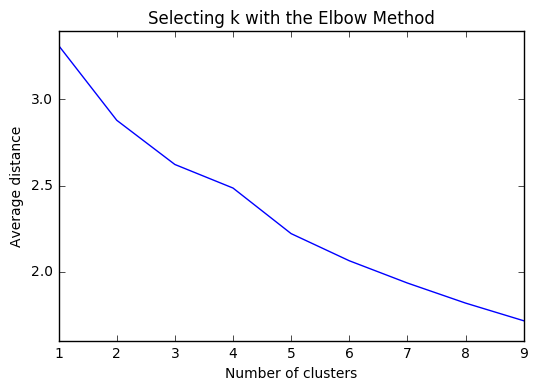

In [16]:
plt.plot(clusters, meandist)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.title('Selecting k with the Elbow Method')

Following the Elbow Method, we will choose 3 clusters.

In [21]:
model3 = KMeans(n_clusters=3)
model3.fit(clus_train)
clusassign = model5.predict(clus_train)

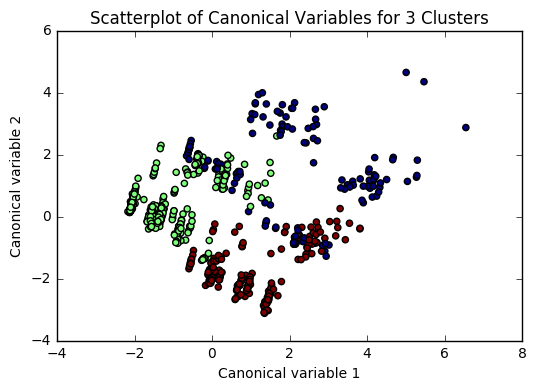

In [22]:
from sklearn.decomposition import PCA
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(clus_train)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=model3.labels_,)
plt.xlabel('Canonical variable 1')
plt.ylabel('Canonical variable 2')
plt.title('Scatterplot of Canonical Variables for 3 Clusters')
plt.show()

Now we merge cluster assignment with clustering variables to examine cluster variable means by cluster:

In [25]:
clus_train.reset_index(level=0, inplace=True)
cluslist = list(clus_train['index'])
labels = list(model3.labels_)
newlist = dict(zip(cluslist, labels))
newclus = DataFrame.from_dict(newlist, orient='index')
newclus.columns = ['cluster']

In [26]:
newclus.reset_index(level=0, inplace=True)
merged_train = pd.merge(clus_train, newclus, on='index')
merged_train.head(n=100)
merged_train.cluster.value_counts()

1    383
2    198
0    131
Name: cluster, dtype: int64

Calculate clustering variable means by cluster:

In [27]:
clustergrp = merged_train.groupby('cluster').mean()
print ("Clustering variable means by cluster")
print(clustergrp)

Clustering variable means by cluster
            level_0       index  Survived       Age      Fare   IsAlone  \
cluster                                                                   
0        357.778626  450.740458  0.404567  0.087920  0.640723 -0.245778   
1        360.681462  454.112272 -0.457091  0.044228 -0.245733  0.267283   
2        343.969697  432.888889  0.616504 -0.143722  0.051420 -0.354407   

         Pclass_1  Pclass_2  Pclass_3  Sex_female  Sex_male  Embarked_C  \
cluster                                                                   
0        0.717482 -0.299555 -0.371238    0.211783 -0.211783    2.096115   
1       -0.208614 -0.012543  0.193410   -0.756138  0.756138   -0.472618   
2       -0.071166  0.222454 -0.128505    1.322511 -1.322511   -0.472618   

         Embarked_Q  Embarked_S  
cluster                          
0         -0.163052   -1.872519  
1         -0.000830    0.439788  
2          0.109484    0.388188  
